# Visualization of 3D MRI scans
This notebook can be used to visualize MRI data and model predictions (Just a scratchbook for now).

In [3]:
from matplotlib import pyplot as plt
import nibabel as nib
from mayavi import mlab
import numpy as np

In [32]:
def visualize_sample(mri_path, mask_path, pet_path = None,
                     cmap="binary_r", brain_slice = (83, slice(None), slice(None)),
                     plot_mayavi = False):

    mri_data = np.squeeze(nib.load(mri_path).get_fdata())[:, :, :]
    mask = np.squeeze(nib.load(mask_path).get_fdata())
    if pet_path is not None:
        pet_data = np.squeeze(nib.load(pet_path).get_fdata())

    assert len(np.unique(mask)) == 2
    mask = mask / mask.max()

    mri_data = np.einsum("ijk -> jki", mri_data)[::-1, ::-1, :]

    print(mri_data.shape, mask.shape)

    mri_data = mri_data #* mask

    plt.imshow(mri_data[(*brain_slice,)], cmap=cmap)
    plt.show()

    if plot_mayavi:
        mlab.contour3d(mri_data[84:, :, :], colormap="black-white")
        mlab.show()

(256, 256, 179) (256, 256, 179)


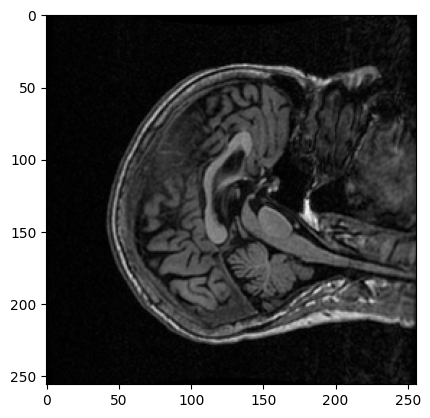

In [33]:
data_path = "../dataset/test2/ADNI/137_S_0841/MP-RAGE/2006-09-27_09_44_23.0/S19351/ADNI_137_S_0841_MR_MP-RAGE__br_raw_20060927105550487_1_S19351_I25113.nii"

mask_path = "../dataset/test2/ADNI/137_S_0841/Total_Intracranial_Volume_Brain_Mask/2006-09-27_10_04_48.0/S19352/ADNI_137_S_0841_MR_Total_Intracranial_Volume_Brain_Mask_Br_20121107235112220_S19352_I345378.nii"

visualize_sample(data_path, mask_path, plot_mayavi=True)

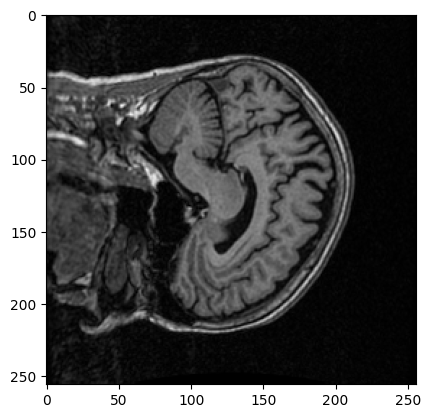

In [16]:
data_path = "../dataset/test2/ADNI/137_S_0841/MP-RAGE/2006-09-27_09_44_23.0/S19351/ADNI_137_S_0841_MR_MP-RAGE__br_raw_20060927105550487_1_S19351_I25113.nii"

mri_data = np.squeeze(nib.load(data_path).get_fdata())
cmap = "binary_r"
plt.imshow(mri_data[:, 84, :], cmap=cmap)
plt.show()

#mlab.contour3d(mask[83:, :, :])
#mlab.show()

In [18]:
data = nib.load(data_path)
print(dir(data))
for k, v in data.header.items():
    print(k, v)


['ImageArrayProxy', 'ImageSlicer', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_affine', '_affine2header', '_compressed_suffixes', '_data_cache', '_dataobj', '_dtype_alias', '_fdata_cache', '_filemap_from_iobase', '_get_fileholders', '_header', '_load_cache', '_meta_sniff_len', '_sniff_meta_for', 'affine', 'as_reoriented', 'dataobj', 'extra', 'file_map', 'files_types', 'filespec_to_file_map', 'from_bytes', 'from_file_map', 'from_filename', 'from_image', 'from_stream', 'from_url', 'get_data', 'get_data_dtype', 'get_fdata', 'get_filename', 'get_qform', 'get_sform', 'header', 'header_class', 'in_memory', 'instance_to_filename', 'load', 'make_file_map', 'makeab